In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

In [3]:
dataset = pd.read_csv('./adult_income.csv')
print(dataset.head())

   ID  age          workclass  education_num       marital_status  \
0   1   39          State-gov             13        Never-married   
1   2   50   Self-emp-not-inc             13   Married-civ-spouse   
2   3   38            Private              9             Divorced   
3   4   53            Private              7   Married-civ-spouse   
4   5   28            Private             13   Married-civ-spouse   

           occupation    race      sex  capital_gain  capital_loss  \
0        Adm-clerical   White     Male          2174             0   
1     Exec-managerial   White     Male             0             0   
2   Handlers-cleaners   White     Male             0             0   
3   Handlers-cleaners   Black     Male             0             0   
4      Prof-specialty   Black   Female             0             0   

   hours_per_week  native_country income_high  
0              40   United-States          No  
1              13   United-States          No  
2              40   

In [4]:
X = dataset.drop('income_high', axis=1)
y = dataset['income_high']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
original_tree = DecisionTreeClassifier(random_state=42)
original_tree.fit(X_train, y_train)

# Evaluate on both sets
train_pred = original_tree.predict(X_train)
test_pred = original_tree.predict(X_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Original Tree - Training Accuracy: {train_accuracy:.4f}")
print(f"Original Tree - Test Accuracy: {test_accuracy:.4f}")
print(f"Difference (Train-Test): {train_accuracy - test_accuracy:.4f}")


Original Tree - Training Accuracy: 1.0000
Original Tree - Test Accuracy: 0.8188
Difference (Train-Test): 0.1812


In [5]:
pruned_tree = DecisionTreeClassifier(
    max_depth=5,              # Limit tree depth
    min_samples_split=50,     # Require more samples to split
    min_samples_leaf=20,      # Require more samples in leaf nodes
    random_state=42
)
pruned_tree.fit(X_train, y_train)

# Evaluate pruned tree
train_pred_pruned = pruned_tree.predict(X_train)
test_pred_pruned = pruned_tree.predict(X_test)
train_accuracy_pruned = accuracy_score(y_train, train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, test_pred_pruned)

print(f"\nPruned Tree - Training Accuracy: {train_accuracy_pruned:.4f}")
print(f"Pruned Tree - Test Accuracy: {test_accuracy_pruned:.4f}")
print(f"Difference (Train-Test): {train_accuracy_pruned - test_accuracy_pruned:.4f}")


Pruned Tree - Training Accuracy: 0.8479
Pruned Tree - Test Accuracy: 0.8500
Difference (Train-Test): -0.0021


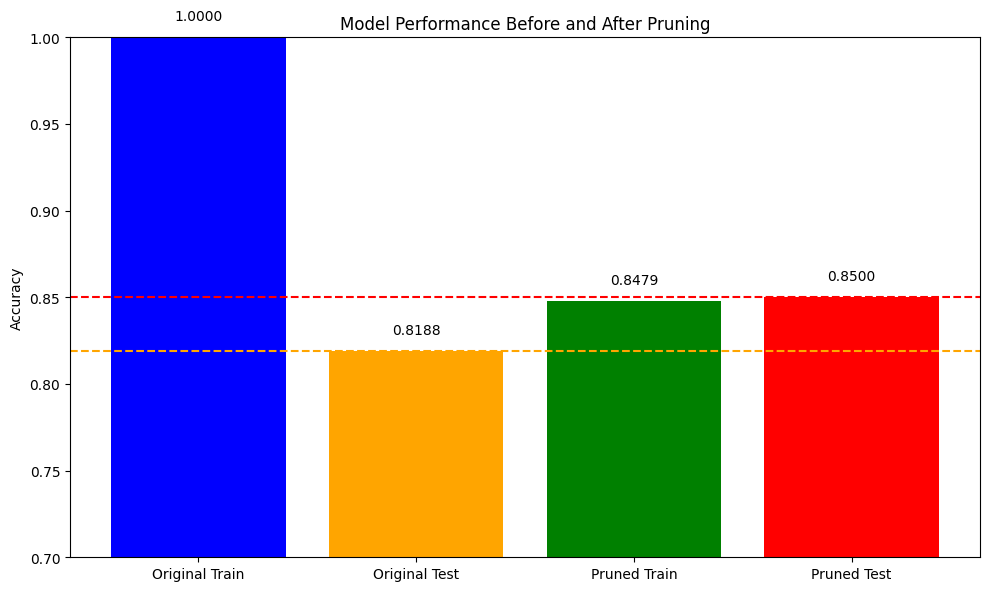

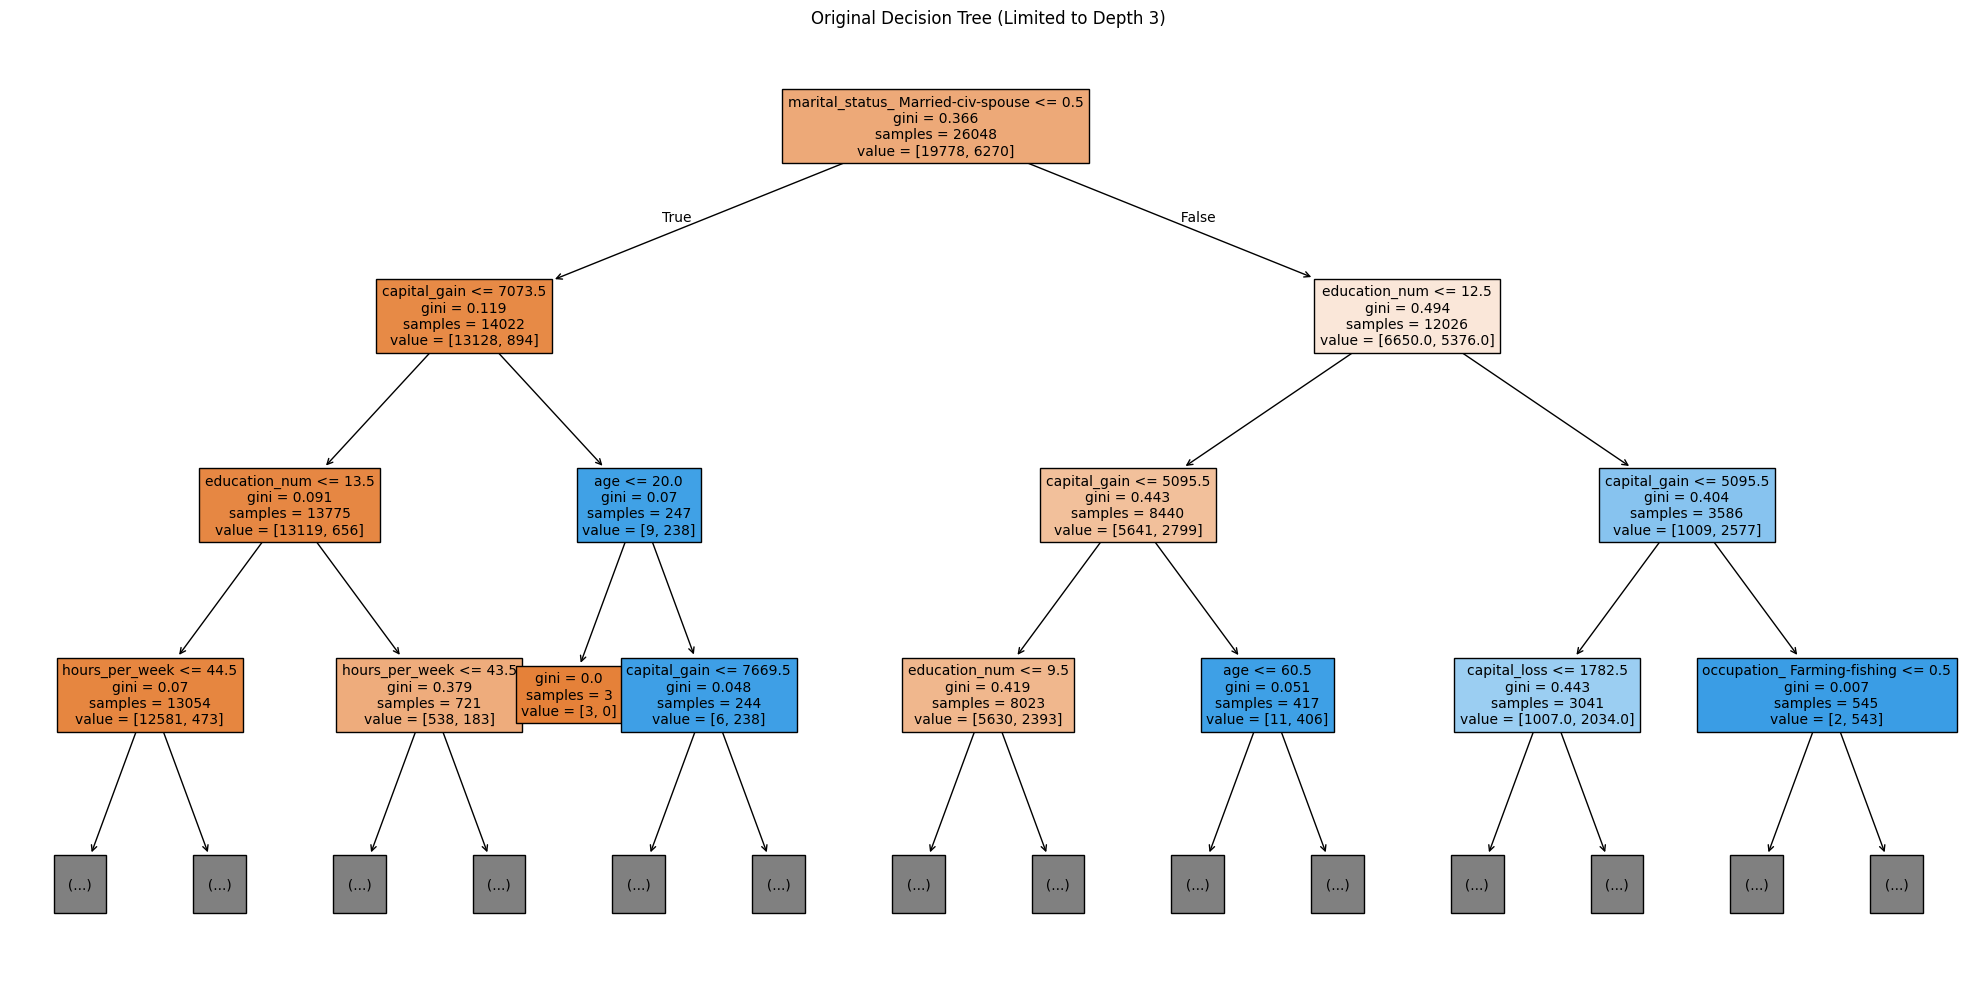

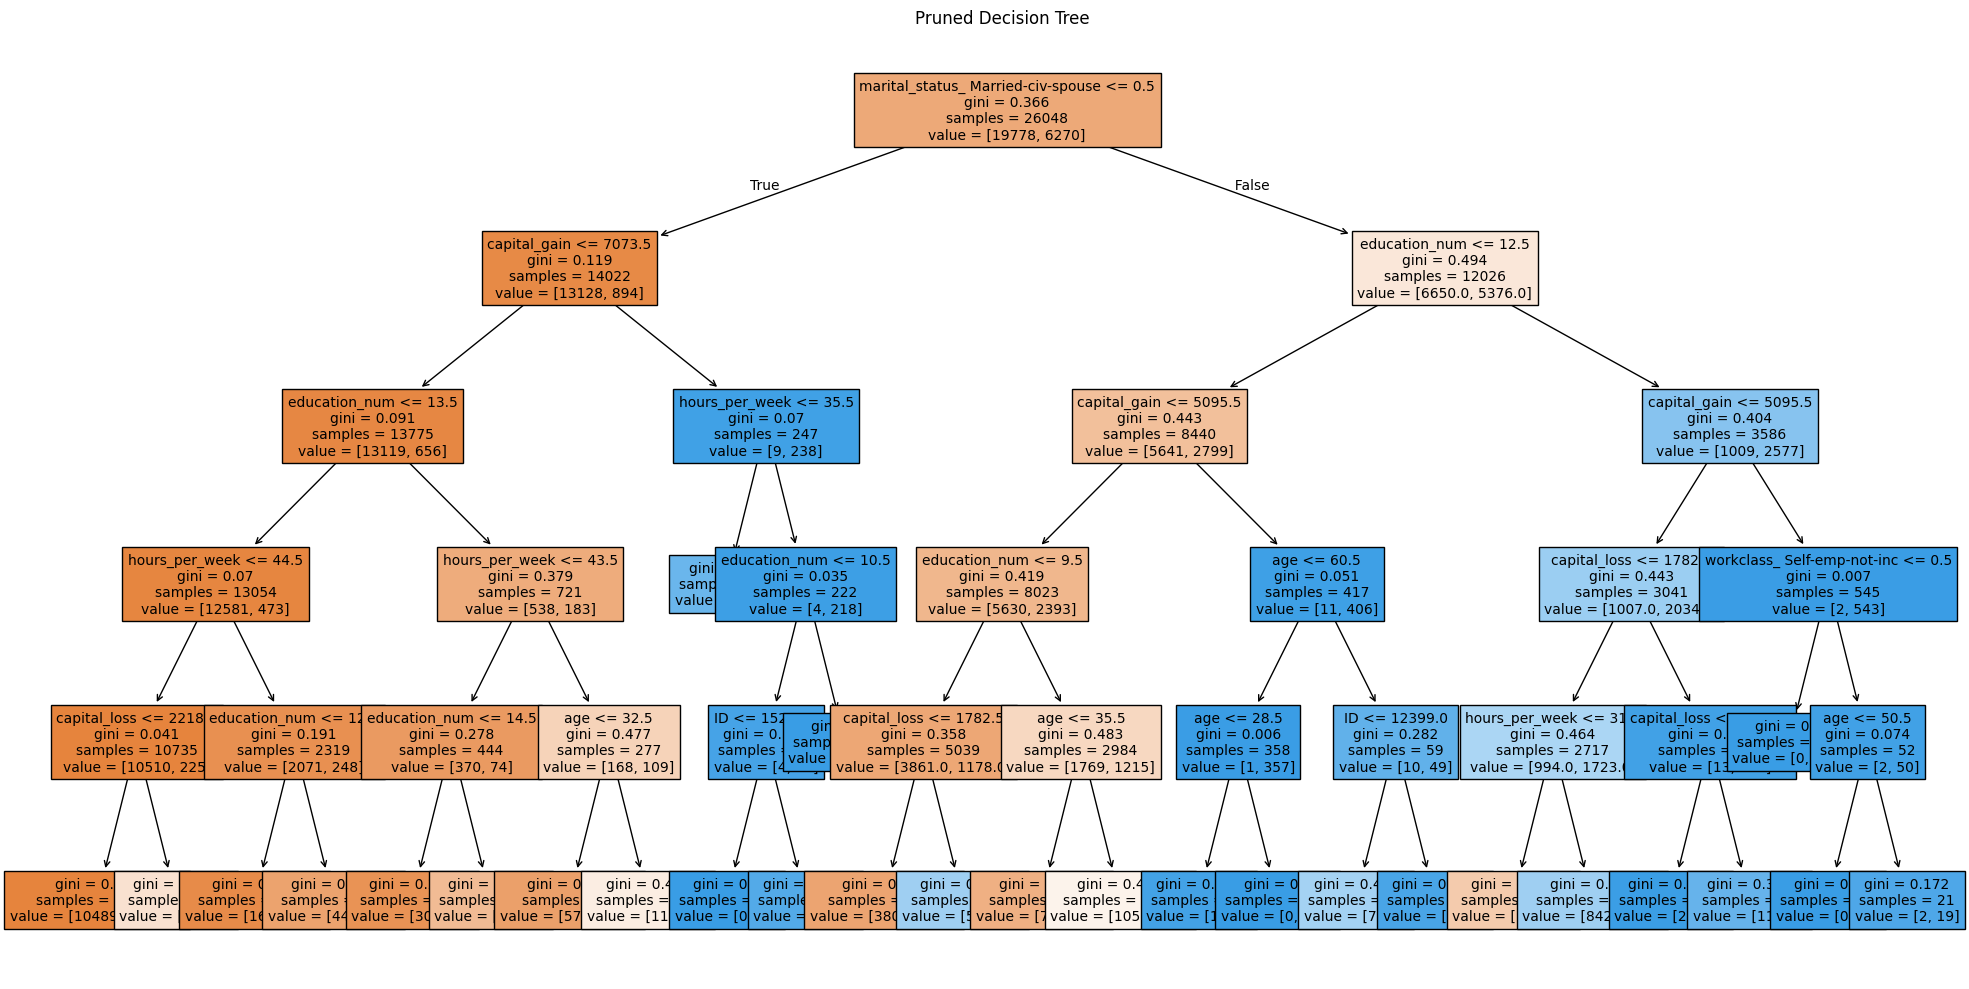

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(['Original Train', 'Original Test', 'Pruned Train', 'Pruned Test'],
        [train_accuracy, test_accuracy, train_accuracy_pruned, test_accuracy_pruned],
        color=['blue', 'orange', 'green', 'red'])
plt.axhline(y=test_accuracy, color='orange', linestyle='--')
plt.axhline(y=test_accuracy_pruned, color='red', linestyle='--')
plt.ylabel('Accuracy')
plt.title('Model Performance Before and After Pruning')
plt.ylim(0.7, 1.0)  # Adjust as needed

for i, v in enumerate([train_accuracy, test_accuracy, train_accuracy_pruned, test_accuracy_pruned]):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Visualize original tree (limited to depth=3 for display purposes)
plt.figure(figsize=(20, 10))
tree.plot_tree(original_tree, max_depth=3, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Original Decision Tree (Limited to Depth 3)")
plt.tight_layout()
plt.show()

# Visualize pruned tree
plt.figure(figsize=(20, 10))
tree.plot_tree(pruned_tree, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Pruned Decision Tree")
plt.tight_layout()
